In [1]:
pip install pycaret

     |████████████████████████████████| 301 kB 4.3 MB/s 
     |████████████████████████████████| 2.0 MB 54.4 MB/s 
     |████████████████████████████████| 114 kB 43.1 MB/s 
     |████████████████████████████████| 1.3 MB 47.3 MB/s 
     |████████████████████████████████| 15.6 MB 49.1 MB/s 
     |████████████████████████████████| 261 kB 61.3 MB/s 
     |████████████████████████████████| 1.7 MB 58.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 6.8 MB 43.2 MB/s 
     |████████████████████████████████| 167 kB 59.2 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 10.9 MB 36.8 MB/s 
     |████████████████████████████████| 636 kB 62.8 MB/s 
     |██████████████████

In [3]:
#import libraries
import pandas as pd
import numpy as np
from collections import Counter
from functools import reduce
from sklearn import preprocessing
from pycaret.classification import *
import matplotlib.pyplot as plt 
import seaborn as sns

In [115]:
#import data
df_train=pd.read_csv('/content/Classification du traitement des Patients.csv')
df_test=pd.read_csv('/content/Classification du traitement des Patients (1).csv')

In [ ]:
df_train.head(2)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,37.1,12.2,4.16,16.7,299,29.3,32.9,89.2,47,F,1
1,35.9,12.4,4.12,11.8,152,30.1,34.5,87.1,60,M,1


In [ ]:
df_train.shape,df_test.shape

((2316, 11), (993, 11))

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   2316 non-null   float64
 1   HAEMOGLOBINS  2316 non-null   float64
 2   ERYTHROCYTE   2316 non-null   float64
 3   LEUCOCYTE     2316 non-null   float64
 4   THROMBOCYTE   2316 non-null   int64  
 5   MCH           2316 non-null   float64
 6   MCHC          2316 non-null   float64
 7   MCV           2316 non-null   float64
 8   AGE           2316 non-null   int64  
 9   SEX           2316 non-null   object 
 10  SOURCE        2316 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 199.2+ KB


In [ ]:
# Show the percentage of missing values in train data

df_train.isna().mean().to_frame(name='Missing %')

,Missing %
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


In [ ]:
# Show the percentage of missing values in test data

df_test.isna().mean().to_frame(name='Missing %')

,Missing %
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


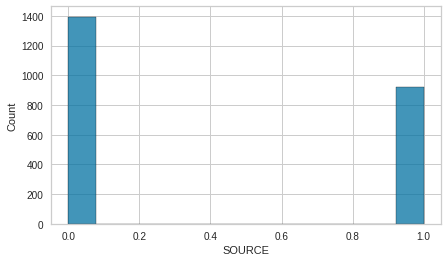

In [ ]:
# Target distribution
plt.figure(figsize=(7,4))
fig = sns.histplot(x='SOURCE', data=df_train)

In [ ]:
df_train.SOURCE.value_counts().to_frame(name='Count')

,Count
0,1394
1,922


In [ ]:
#get numeric features
features = [feat for feat in df_train.columns if feat !='SOURCE']
num_features = [feat for feat in features if df_train[feat].dtype != object]

In [ ]:
num_features

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE']

In [ ]:
df_train[num_features].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000,2316.000000
mean,38.230915,12.755872,4.534693,8.823964,258.630397,28.305268,33.356434,84.786226,46.805699
std,5.868669,2.043026,0.765682,5.164134,113.151771,2.688948,1.228086,6.884380,21.761108
min,18.800000,5.800000,1.930000,1.100000,10.000000,15.500000,26.100000,54.100000,1.000000
25%,34.300000,11.400000,4.030000,5.600000,189.000000,27.300000,32.700000,81.800000,29.000000
50%,38.600000,12.900000,4.560000,7.600000,258.000000,28.800000,33.400000,85.450000,48.000000
75%,42.425000,14.200000,5.030000,10.500000,322.000000,29.900000,34.100000,88.900000,64.000000
max,69.000000,18.800000,7.860000,76.600000,910.000000,40.800000,38.100000,115.600000,98.000000


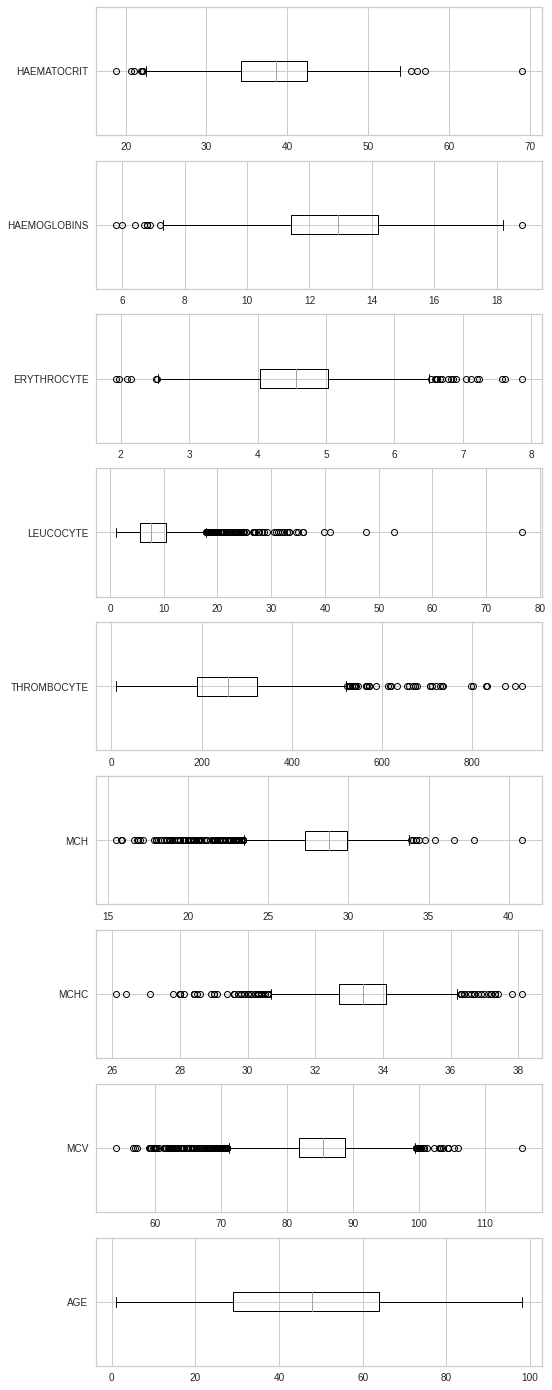

In [ ]:
#box plot to control the Outliers 
fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df_train[[c]].boxplot(ax=axes[i], vert=False)

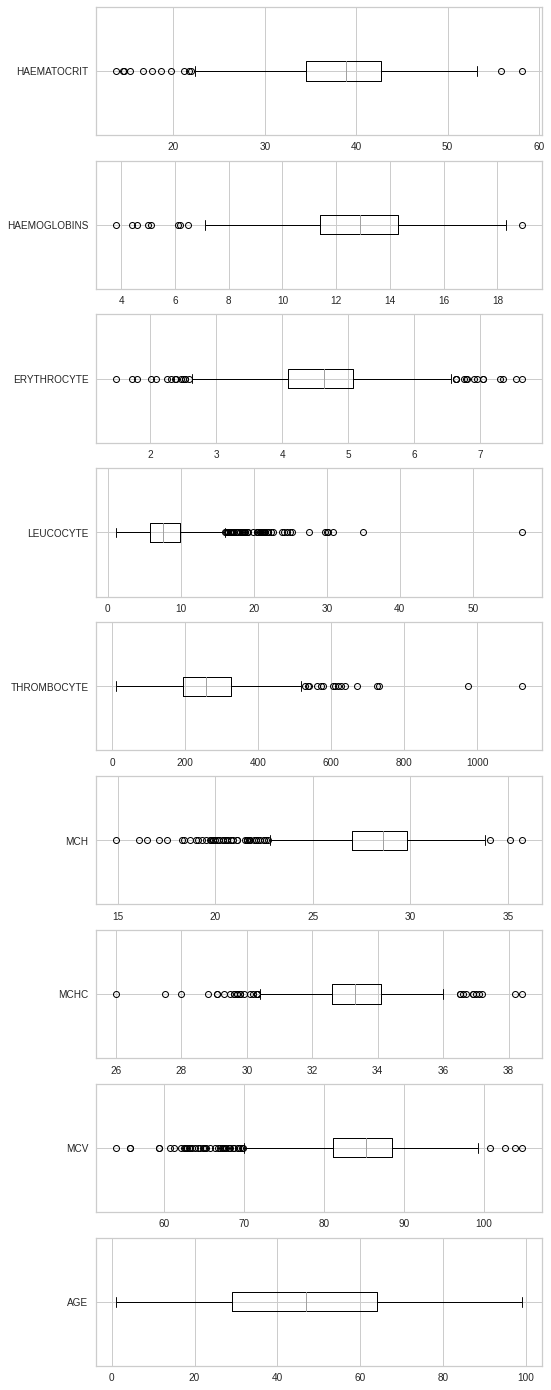

In [ ]:
#box plot to control the Outliers 
fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df_test[[c]].boxplot(ax=axes[i], vert=False)

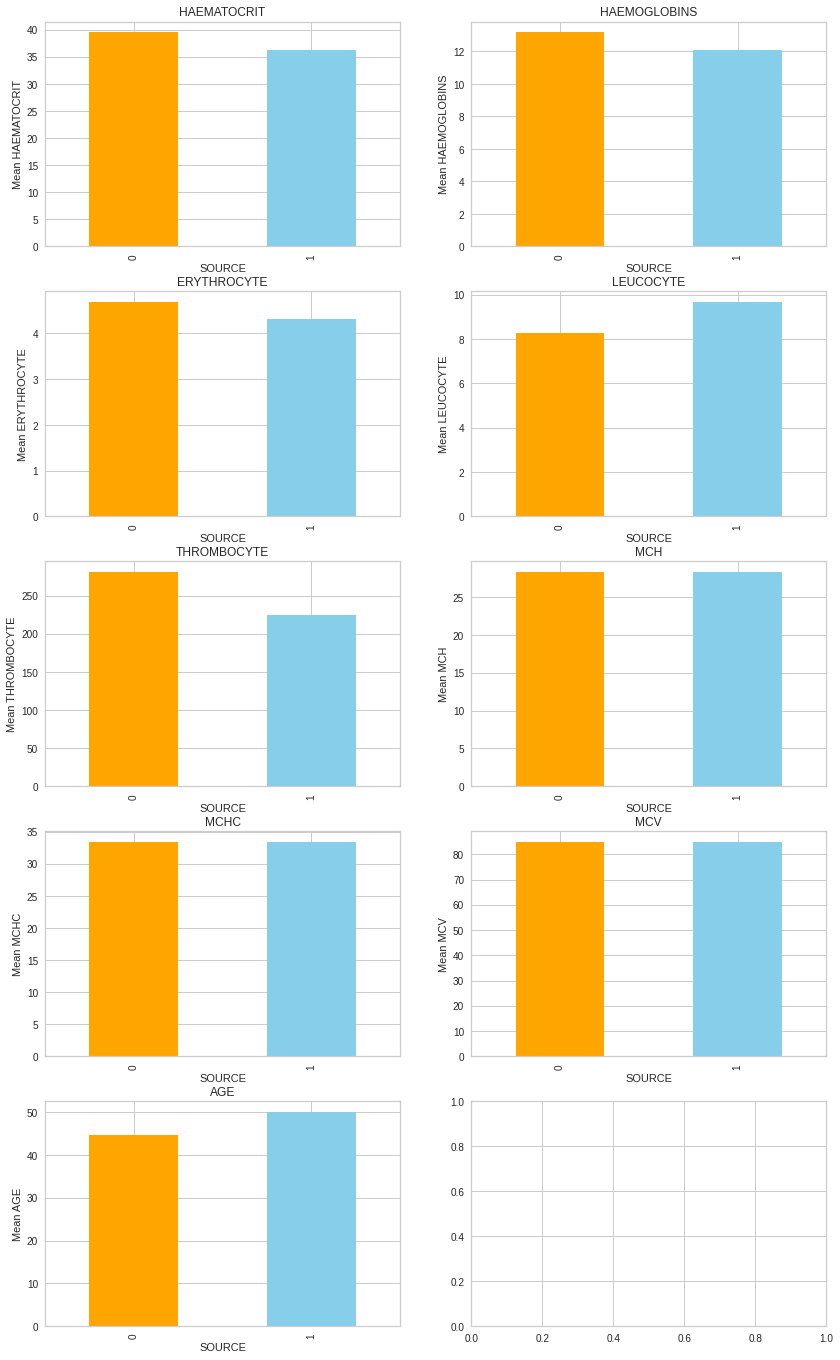

In [ ]:
# Relationship between target and mean of each numerical features
fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(df_train[num_features]):
    df = df_train.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel=f'Mean {c}', color=('orange','skyblue'))

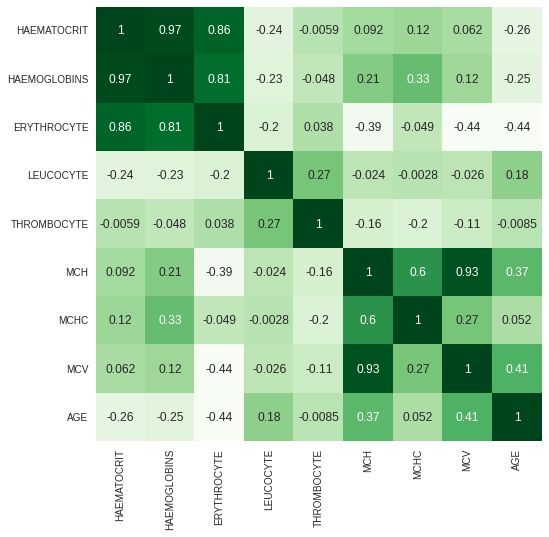

In [ ]:
# Pearson Correlation of features w.r.t each other

corr_matt = df_train[num_features].corr(method='pearson')
plt.figure(figsize=(8,8))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

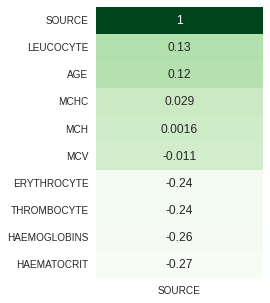

In [ ]:
# Pearson's Correlation of features w.r.t target

corr_matt = df_train.corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='Greens', cbar=False)

In [116]:
#drop some outliers
df_train = df_train[df_train.HAEMATOCRIT < 65]
df_train = df_train[df_train.LEUCOCYTE < 70]
df_train = df_train[df_train.MCH < 40]


In [87]:
df_train.shape

(2313, 11)

In [117]:
#transform the variable sex to 0 and 1
df_train=df_train.replace({'SEX' : { 'M' :0, 'F':1}})
df_train['SEX']=df_train['SEX'].astype(int)
df_test=df_test.replace({'SEX' : { 'M' :0, 'F':1}})
df_test['SEX']=df_test['SEX'].astype(int)

In [118]:
#pycaret envirement with default parameteres
clf1 = setup(data = df_train, 
             target = 'SOURCE',
             numeric_imputation = 'mean',
             silent = True,
             fold=5)

,Description,Value
0,session_id,3883
1,Target,SOURCE
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2313, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [119]:
#Compare between ML models

compare_models(fold = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7511,0.7819,0.5966,0.7246,0.6535,0.4622,0.4683,0.586
rf,Random Forest Classifier,0.7468,0.7818,0.5903,0.7174,0.6468,0.4525,0.4584,0.688
gbc,Gradient Boosting Classifier,0.7350,0.7743,0.5793,0.7016,0.6329,0.4285,0.4348,0.280
lightgbm,Light Gradient Boosting Machine,0.7307,0.7639,0.5981,0.6841,0.6366,0.4243,0.4282,0.104
ada,Ada Boost Classifier,0.7183,0.7335,0.5509,0.6737,0.6057,0.3902,0.3952,0.154
lr,Logistic Regression,0.7103,0.7469,0.4694,0.7046,0.5595,0.3565,0.3754,0.102
qda,Quadratic Discriminant Analysis,0.7054,0.7357,0.5085,0.6649,0.5744,0.3558,0.3643,0.020
lda,Linear Discriminant Analysis,0.7010,0.7441,0.4396,0.6984,0.5361,0.3317,0.3534,0.022
ridge,Ridge Classifier,0.6998,0.0000,0.4334,0.7005,0.5311,0.3277,0.3510,0.018
knn,K Neighbors Classifier,0.6973,0.7261,0.5338,0.6440,0.5819,0.3479,0.3532,0.146


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3883, verbose=0,
                     warm_start=False)

In [120]:
#try lgbm 
model_1  = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7068,0.7542,0.5906,0.6356,0.6122,0.3770,0.3777
1,0.7160,0.7200,0.5669,0.6606,0.6102,0.3889,0.3917
2,0.7685,0.8020,0.5938,0.7677,0.6696,0.4959,0.5056
3,0.7531,0.7730,0.5938,0.7308,0.6552,0.4661,0.4721
4,0.7090,0.7706,0.6457,0.6260,0.6357,0.3935,0.3936
Mean,0.7307,0.7639,0.5981,0.6841,0.6366,0.4243,0.4282
SD,0.0253,0.0268,0.0258,0.0556,0.0234,0.0476,0.0510


In [121]:
#best parameters
tun_model_1 = tune_model(model_1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7469,0.7793,0.6850,0.6744,0.6797,0.4705,0.4706
1,0.7130,0.7179,0.5276,0.6700,0.5903,0.3742,0.3805
2,0.7747,0.8062,0.6250,0.7619,0.6867,0.5135,0.5196
3,0.7593,0.7822,0.6016,0.7404,0.6638,0.4794,0.4857
4,0.7492,0.7621,0.6535,0.6917,0.6721,0.4693,0.4698
Mean,0.7486,0.7695,0.6185,0.7077,0.6585,0.4614,0.4652
SD,0.0203,0.0294,0.0534,0.0369,0.0349,0.0464,0.0460


In [122]:
predict_model(tun_model_1);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7421,0.7895,0.5775,0.7354,0.6469,0.4484,0.4565


In [123]:
x_test=df_test.drop('trustii_id', axis = 1)
predict_new = predict_model(tun_model_1, data=x_test)
predict_new.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,Label,Score
0,24.1,7.6,2.53,5.8,248,30.0,31.5,95.3,81,0,0,0.9178
1,42.2,13.1,6.03,7.7,265,21.7,31.0,70.0,21,0,0,0.9507
2,38.3,13.0,4.37,8.4,145,29.7,33.9,87.6,82,0,1,0.6348
3,39.0,11.6,5.57,9.0,353,20.8,29.7,70.0,40,0,0,0.8557
4,37.7,12.4,4.31,9.8,284,28.8,32.9,87.5,46,1,1,0.6681


In [124]:
#create submission file 

sub=pd.DataFrame()
sub['trustii_id']=df_test['trustii_id']
sub['SOURCE']=predict_new['Label']
sub.to_csv('submission.csv',index=False)